# Guía 3 - Ejercicio 4.2

## Imports y lectura de imágenes

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mostrar_imagenes(imagenes, titulos):
    fig, axs = plt.subplots(1, len(imagenes), figsize=(15, 5))
    for i, imagen in enumerate(imagenes):
        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(titulos[i])
        axs[i].axis('on')
    plt.show()

ruta1 = "Imagenes_Ej/mariposa02.png"
ruta2 = "Imagenes_Ej/flores02.jpg"
ruta3 = "Imagenes_Ej/lapices02.jpg"

mariposa = cv.imread(ruta1, cv.IMREAD_GRAYSCALE)
flores = cv.imread(ruta2, cv.IMREAD_GRAYSCALE)
lapices = cv.imread(ruta3, cv.IMREAD_GRAYSCALE)


## Definición de filtros
Se definen los filtros pasa bajo y bilateral: 
- En el caso del pasa bajo se utiliza la función blur de opencv y se elige un tamaño de kernel, a mayor tamaño de kernel mayor va a ser la vecindad, generando una mezcla más suave.
- En el caso del bilateral se utiliza la función bilateralFilter que recibe un diametro, un color de sigma y un espacio de sigma. 
    - El diámetro del vecindario alrededor del píxel que se utilizará durante el cálculo. Un valor más grande significa que se consideran más píxeles en el vecindario.
    - Controla cuánta diferencia de color se permitirá entre píxeles dentro del vecindario. Un valor más grande significa que se considerará una mayor diferencia de color (en este caso intensidades).
    - Controla cuánta diferencia de posición espacial se permitirá entre píxeles dentro del vecindario. Un valor más grande significa que se considerarán píxeles más alejados en el espacio.

In [22]:
size_kernel = 5
mariposa_PB = cv.blur(mariposa,(size_kernel,size_kernel))
flores_PB = cv.blur(flores,(size_kernel,size_kernel))
lapices_PB = cv.blur(lapices,(size_kernel,size_kernel))

diametro = 9 
sigma_color = 75 
sigma_space = 75 
mariposa_BI = cv.bilateralFilter(mariposa,d=diametro, sigmaColor=sigma_color, sigmaSpace=sigma_space)
flores_BI = cv.bilateralFilter(flores,d=diametro,sigmaColor=sigma_color, sigmaSpace=sigma_space)
lapices_BI = cv.bilateralFilter(lapices,d=diametro, sigmaColor=sigma_color, sigmaSpace= sigma_space)


## Visualización de las imagenes con los filtros aplicados

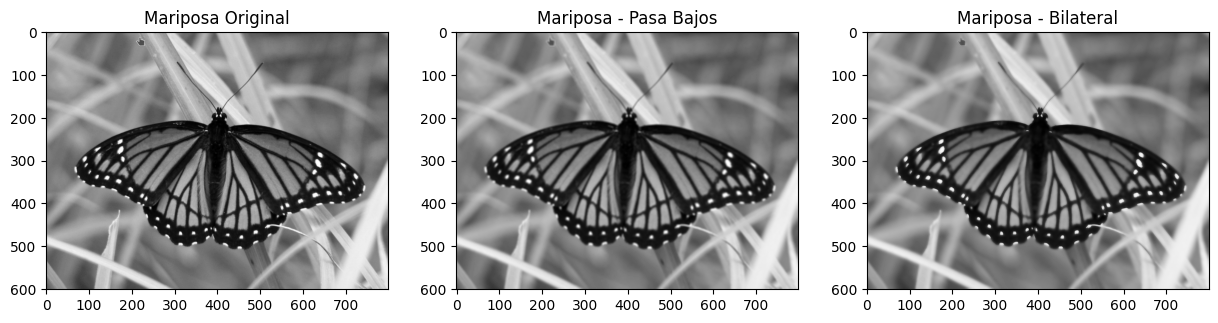

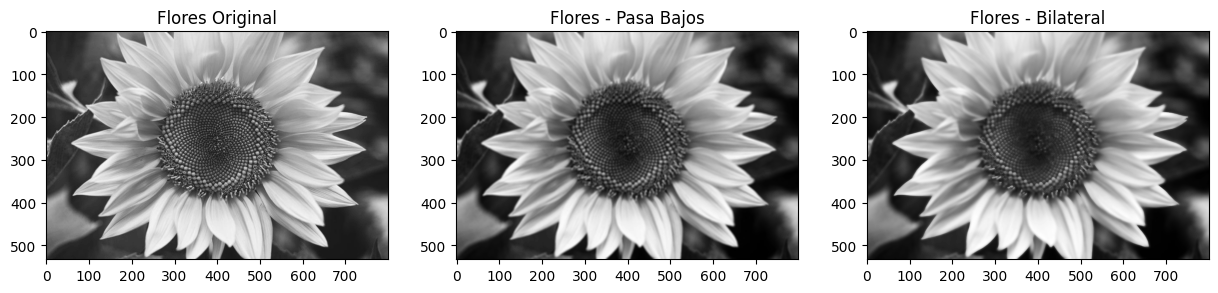

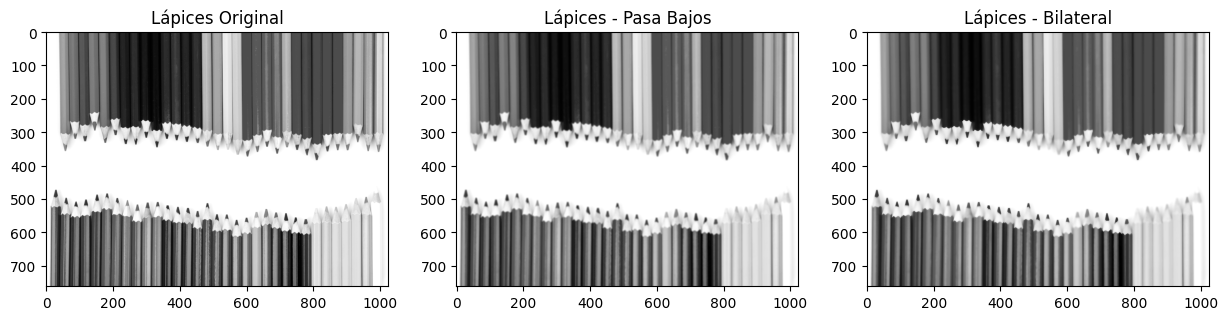

In [23]:
mostrar_imagenes([mariposa, mariposa_PB, mariposa_BI], ["Mariposa Original", "Mariposa - Pasa Bajos", "Mariposa - Bilateral"])
mostrar_imagenes([flores, flores_PB, flores_BI], ["Flores Original", "Flores - Pasa Bajos", "Flores - Bilateral"])
mostrar_imagenes([lapices, lapices_PB, lapices_BI], ["Lápices Original", "Lápices - Pasa Bajos", "Lápices - Bilateral"])

## Extracción de perfiles de grises utilizando mouse
Para utilizar la función hacer click sobre la imagen, luego apretar escape y así se van obteniendo las gráficas de los perfiles de grises para cada imagen.

X:  406
Y:  184


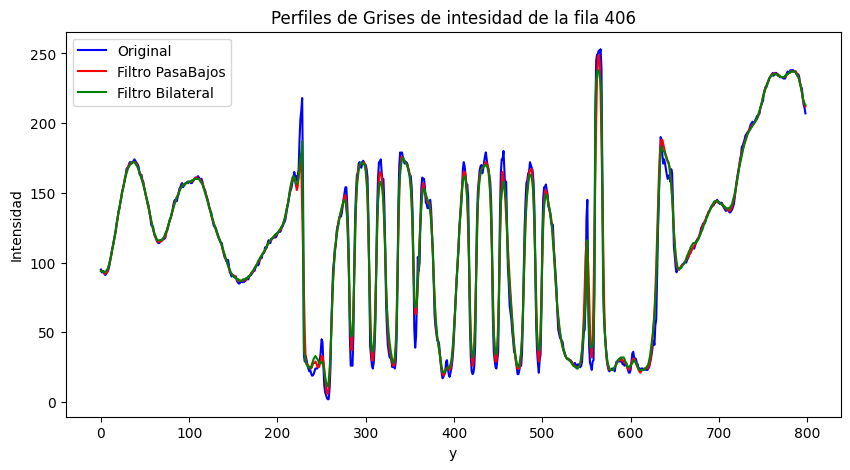

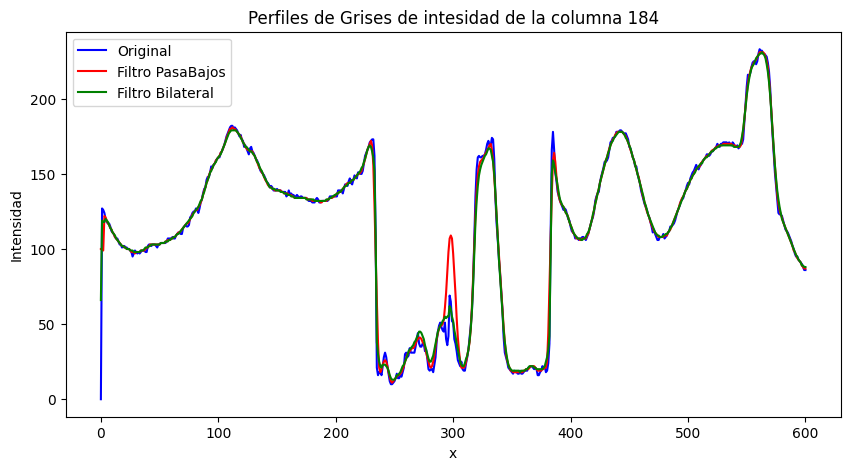

X:  468
Y:  516


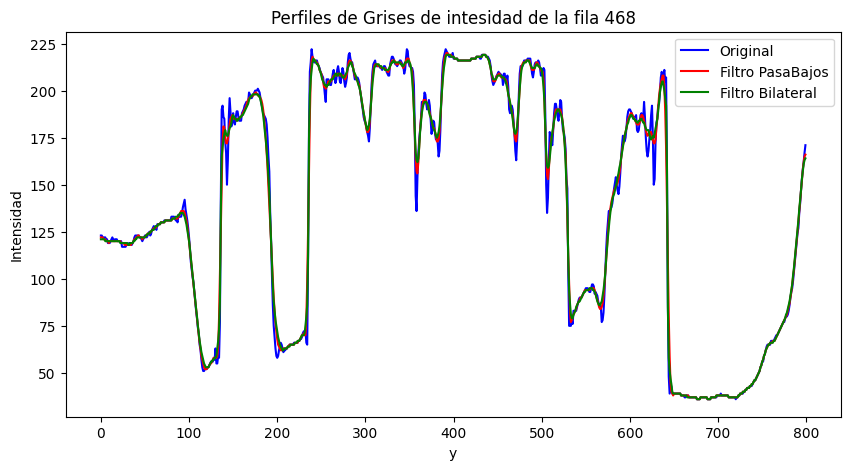

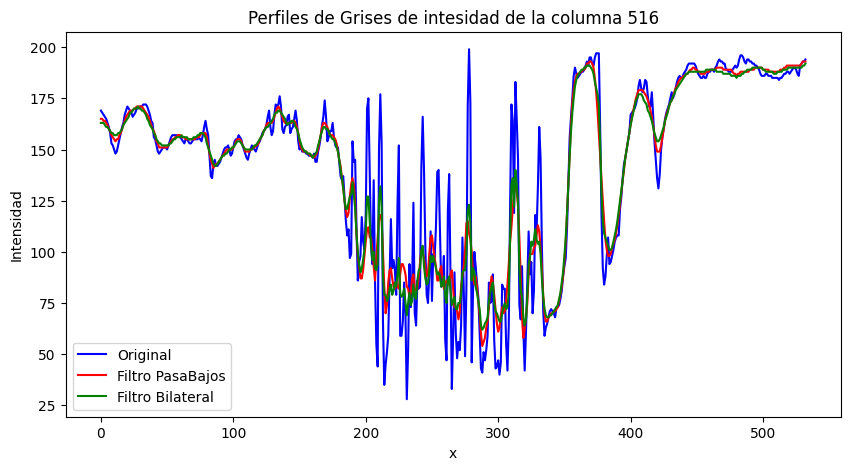

X:  333
Y:  407


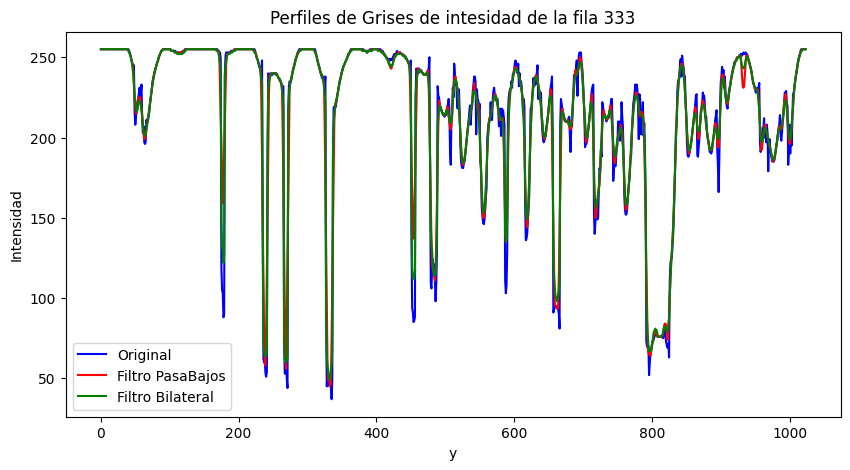

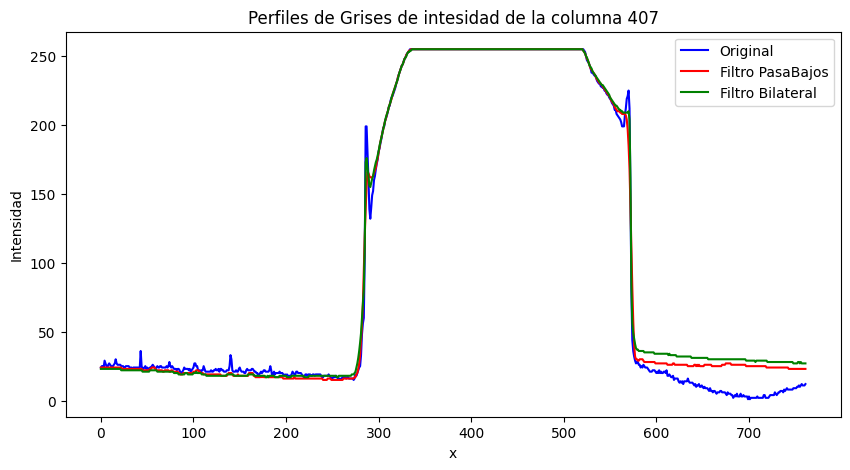

In [24]:
def extraer_perfiles(imagen1, imagen2, imagen3):
    def on_click(event, x, y, flags, param):
        if event == cv.EVENT_LBUTTONDOWN:
            print("X: ", x)
            print("Y: ", y)
            perfilesX = []
            perfilesY = []
            imagenes = [imagen1,imagen2,imagen3]
            
            #Perfil de intensidad filas
            for i in range(len(imagenes)):
                perfilesX.append(imagenes[i][x,:])
            plt.figure(figsize=(10, 5))
            colors = ['blue', 'red', 'green']
            labels = ['Original', 'Filtro PasaBajos', 'Filtro Bilateral']
            for i, profile in enumerate(perfilesX):
                plt.plot(perfilesX[i], color=colors[i], label=labels[i])
            plt.title(f'Perfiles de Grises de intesidad de la fila {x}')
            plt.grid(True,'minor')
            plt.xlabel('y')
            plt.ylabel('Intensidad')
            plt.legend()

            #Perfil de intensidad columna
            for i in range(len(imagenes)):
                perfilesY.append(imagenes[i][:,y])

            plt.figure(figsize=(10,5))
            colors = ['blue', 'red', 'green']
            labels = ['Original', 'Filtro PasaBajos', 'Filtro Bilateral']
            for i, profile in enumerate(perfilesY):
                plt.plot(perfilesY[i], color=colors[i], label=labels[i])
            plt.title(f'Perfiles de Grises de intesidad de la columna {y}')
            plt.grid(True,'minor')
            plt.xlabel('x')
            plt.ylabel('Intensidad')
            plt.legend()

            plt.show()

    cv.namedWindow('Seleccionar perfiles')
    cv.setMouseCallback('Seleccionar perfiles', on_click)

    cv.imshow('Seleccionar perfiles', imagen1)
    
    cv.waitKey(0)
    cv.destroyAllWindows()

# Llamar a la función para extraer y visualizar los perfiles
mariposa = np.array(mariposa)
mariposa_PB = np.array(mariposa_PB)
mariposa_BI = np.array(mariposa_BI)

extraer_perfiles(mariposa, mariposa_PB, mariposa_BI)
extraer_perfiles(flores, flores_PB, flores_BI)
extraer_perfiles(lapices, lapices_PB, lapices_BI)




## Conclusiones
En el filtro pasa bajos se suaviza la imagen, ya que se promedian los valores de una cantidad de píxeles en una determinada vecindad alrededor de cada píxel. Esto elimina detalles de alta frecuencia, generando una imagen más suave y borrosa. Observando el gráfico de perfiles de grises se puede ver como se obtienen curvas más suaves, ya que se pierde un poco de los cambios abruptos de frecuencia dada por las altas frecuencias, lo que resulta en una curva más suave con menos picos. Por ejemplo: En la gráfica de perfiles de grises de una columna de la imagen de los lapices se observa la diferencia clara entre suavidad, donde el pasa bajos hace que todos los valores sean muy similares.

En el filtro bilateral también suaviza la imagen, pero conservando mejor los bordes y detalles, ya que considera además de la distancia entre píxeles, la diferencia entre sus valores. Esto genera un suavisazo pero manteniendo bordes y detalles importantes. Observando los perfiles de grises se ve un perfil más suavizado con respecto a la original pero menos que el pasa bajos.